In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats      #per poisson
from scipy import optimize
import urllib.request
import pickle

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [31]:
x0=15
mu= 6.3
sigma_mu = np.sqrt(mu)
Z =abs(x0-mu)/sigma_mu

if Z >= 3:
    print("The difference is statistically significant.")
else:
    print("The difference is not statistically significant.")

The difference is statistically significant.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

The change in blood pressures within our sample was statistically significant.


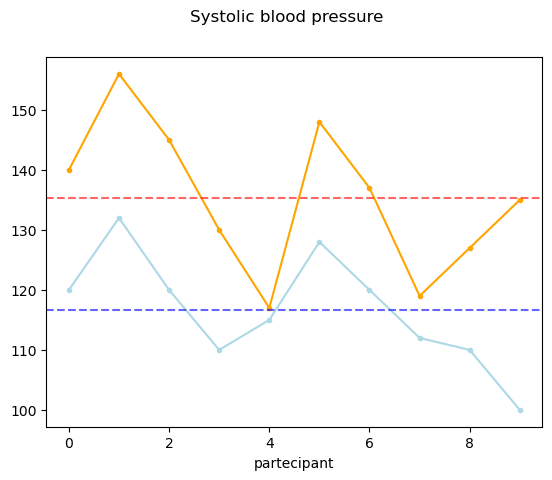

In [40]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])


n = len(pre)

indexes = np.arange(n)



#defining formulas
def T(x1,x2,s,n):
    return (x1-x2)/(s*np.sqrt(2/n))

def sigma(s1,s2):
    return np.sqrt((s1**2+s2**2)/2)

#calculating statistics

x1=np.mean(pre)
x2=np.mean(post)

s1=pow(np.var(pre),0.5)
s2=pow(np.var(post),0.5)

sigma=sigma(s1,s2)
t_test=T(x1,x2,sigma,n)

#plot
fig=plt.figure()
fig.suptitle('Systolic blood pressure')
ax=fig.add_subplot()

ax.plot(indexes,pre, marker='.',c='lightblue',label='pre-exposure')
ax.plot(indexes,post, marker='.',c='orange',label='post-exposure')
ax.axhline(x1, linestyle='--', color='blue',alpha=0.6, label='mean pre-exposure')
ax.axhline(x2, linestyle='--', color='red',alpha=0.6, label='mean post-exposure')

plt.xlabel("partecipant")

#evaluating statistical significance
p = stats.t.cdf(t_test, n - 1) + (1.0 - stats.t.cdf(-t_test, n - 1))

if p > 0.05:
    print("The change in blood pressures within our sample was NOT statistically significant.")
else:
    print("The change in blood pressures within our sample was statistically significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [47]:
#data
tmax = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
tmin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

Parameters for max temperature fit:
 [-10.58169955  -0.59227423   7.12331894  27.94963525]
a: -10.581699553465807
b: -0.5922742307765322
c: 7.123318940812507
d: 27.94963525307165

Parameters for min temperature fit:
 [-25.1496206   -0.60132051  -5.13556142 -36.71257793]
a: -25.149620604312112
b: -0.6013205078064785
c: -5.135561423701323
d: -36.71257792962012


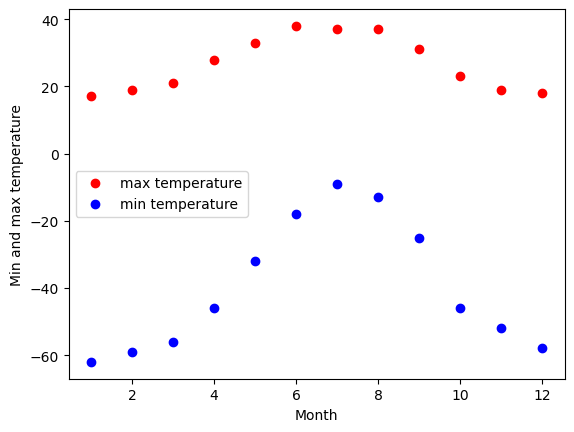

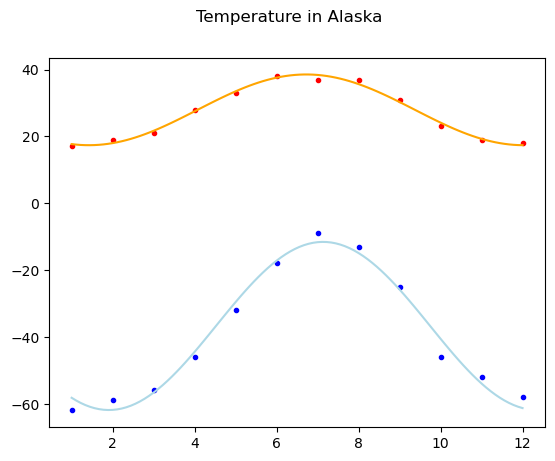

In [77]:
#cosine function
def fcos(x,a,b,c,d):
    return a*np.cos(x*b+c)+d



#plotting data
months = np.array([i for i in range(1,13)])
plt.plot(months, tmax, 'ro', label ="max temperature")
plt.plot(months, tmin, 'bo', label ="min temperature")

plt.legend()
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

#computing fit
poptmax, pcov_max = optimize.curve_fit(fcos, months, tmax)
poptmin, pcov_min = optimize.curve_fit(fcos, months, tmin)

#parameters
print('Parameters for max temperature fit:\n', poptmax)
varr = ["a","b","c","d"]
for i in range(len(poptmax)):
    print(f"{varr[i]}: {poptmax[i]}")
print()
print('Parameters for min temperature fit:\n', poptmin)
varr = ["a","b","c","d"]
for i in range(len(poptmin)):
    print(f"{varr[i]}: {poptmin[i]}")

#plotting fit
x_range=np.linspace(1,12,100)
y_range=np.linspace(-70,40,100)

fig=plt.figure()
fig.suptitle('Temperature in Alaska')
ax=fig.add_subplot()

ax.scatter(months,tmax, marker='.',c='r',label='T max')
ax.plot(x_range, fcos(x_range,*poptmax), c='orange', label='max_T fit')

ax.scatter(months,tmin, marker='.',c='b',label='T min')
ax.plot(x_range, fcos(x_range,*poptmin), c='lightblue',label='min_T fit')


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [3]:
import pandas as pd

url = "https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl?dl=1"
webURL = urllib.request.urlopen(url)
data = pickle.load(webURL)
df = pd.DataFrame(data.item())

df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


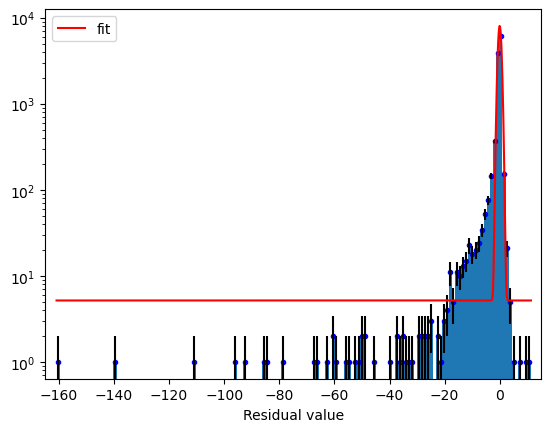


Parameters:
a = 8047.768350493504
b = -0.021542972347251912
c = 0.5935795877578992
d = 5.178545790371258

chi2: 8799.431393129953
p-value: 0.0.

the fit is not considered satisfactory.


In [9]:
#defining fit function

def f(x,a,b,c,d):
    return a*np.exp(-pow(x-b,2)/(2*pow(c,2)))+d
    
n=150

res=df['residuals']


plt.hist(res, bins = n)

#histograms setting
y,binEdges = np.histogram(res,bins=n)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
yerr = np.sqrt(y)
plt.bar(bincenters, y, width=0, yerr=yerr)


#filtering for 0
mask = np.where(y>0)
y_filtred=y[mask]
yerr_filtered=yerr[mask]
bincenters_filtred=bincenters[mask]

#fitting
popt, pcov = optimize.curve_fit(f, bincenters, y)

#plotting
x_range=np.linspace(df['residuals'].min(),df['residuals'].max(),1000) 
plt.plot(x_range, f(x_range,*popt), "r-" ,label='fit',)

plt.scatter(bincenters,y,marker='.',color='blue')

plt.xlabel('Residual value')
plt.xlim(-165,15)
plt.yscale('log')
plt.legend(loc='best')

plt.show()

#printing parameters
print('\nParameters:')
varrs =["a","b","c","d"] 
for i in range(len(popt)):
    print(f"{varrs[i]} = {popt[i]}")

# chi2 test
ndof = n - 1
chi2 = np.sum(((y_filtred - f(bincenters_filtred,*popt))**2) / yerr_filtered)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print()
print('chi2:',chi2)
print(f"p-value: {pvalue}.") 
print()

if pvalue >= 0.05:
    print("the fit is considered satisfactory." )
else:
    print("the fit is not considered satisfactory." )

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.